In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

14342

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

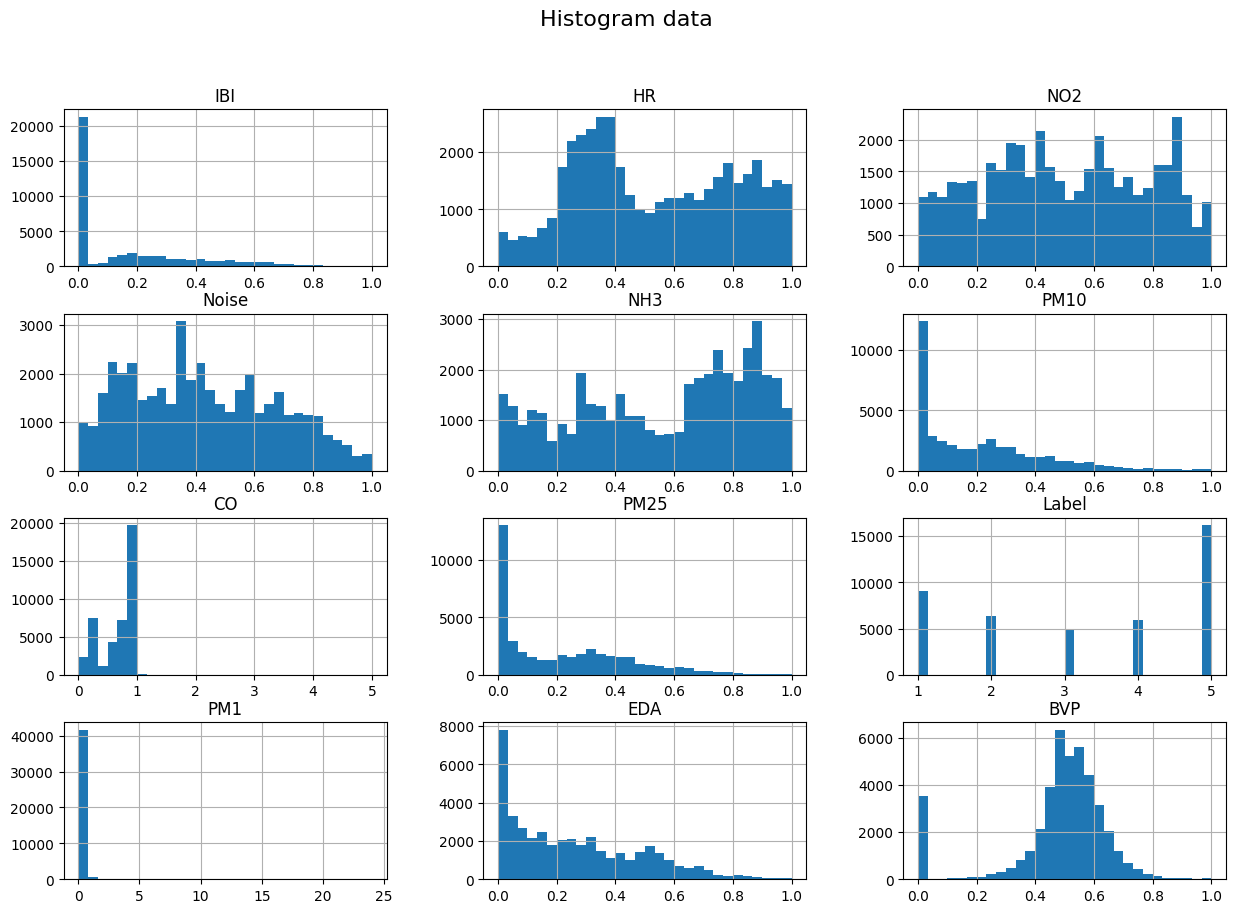

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1461/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


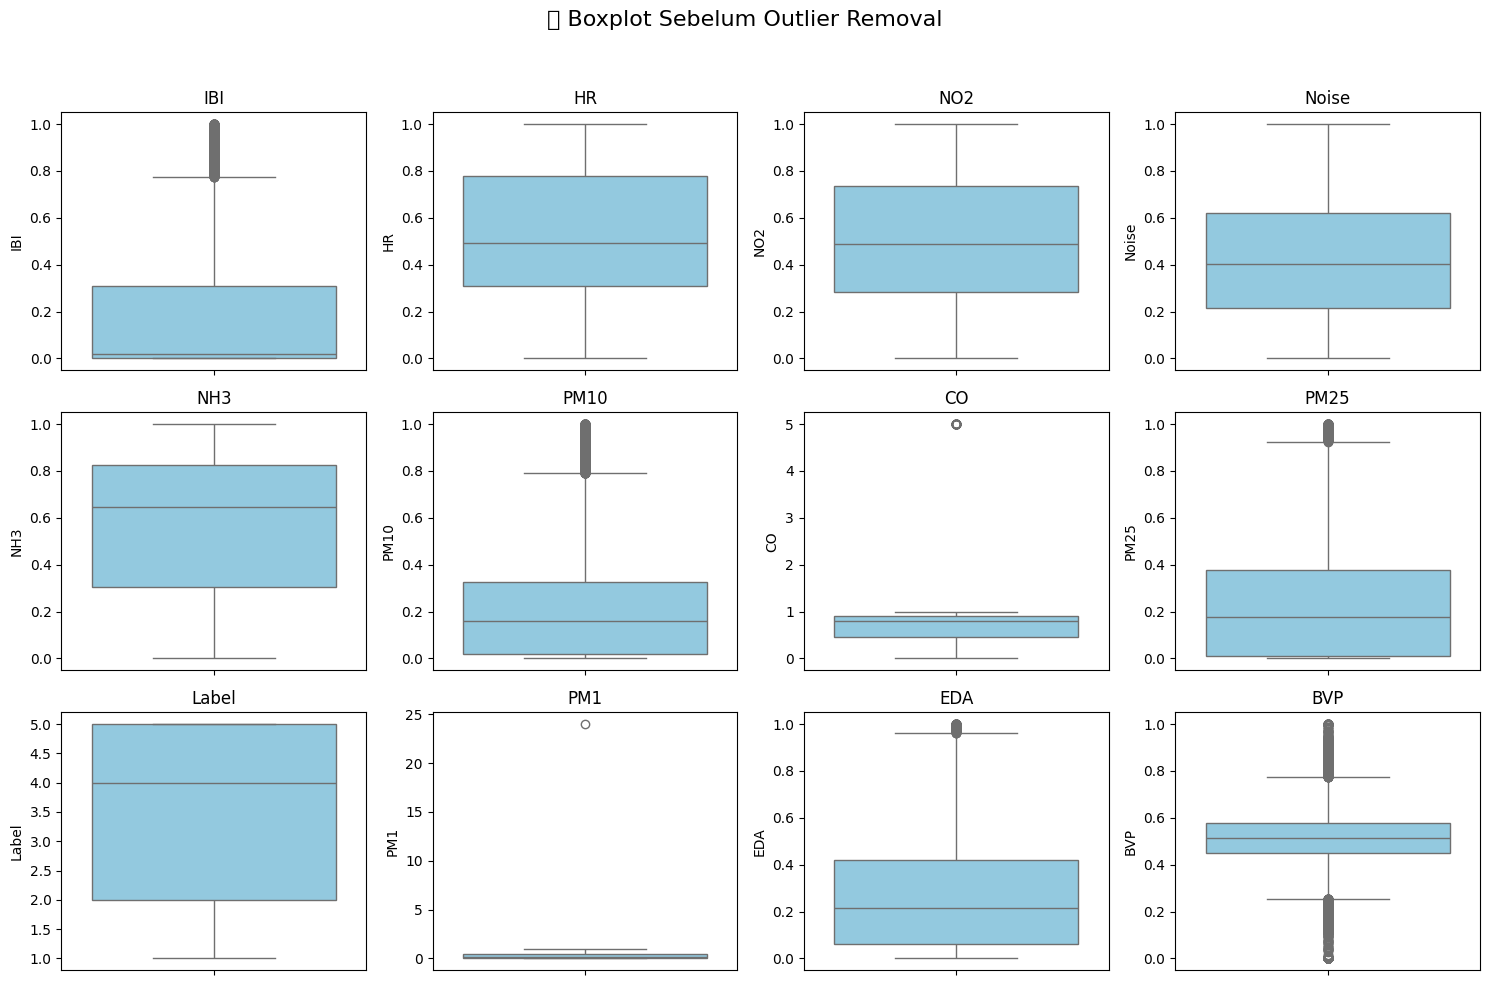

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [13]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1461/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


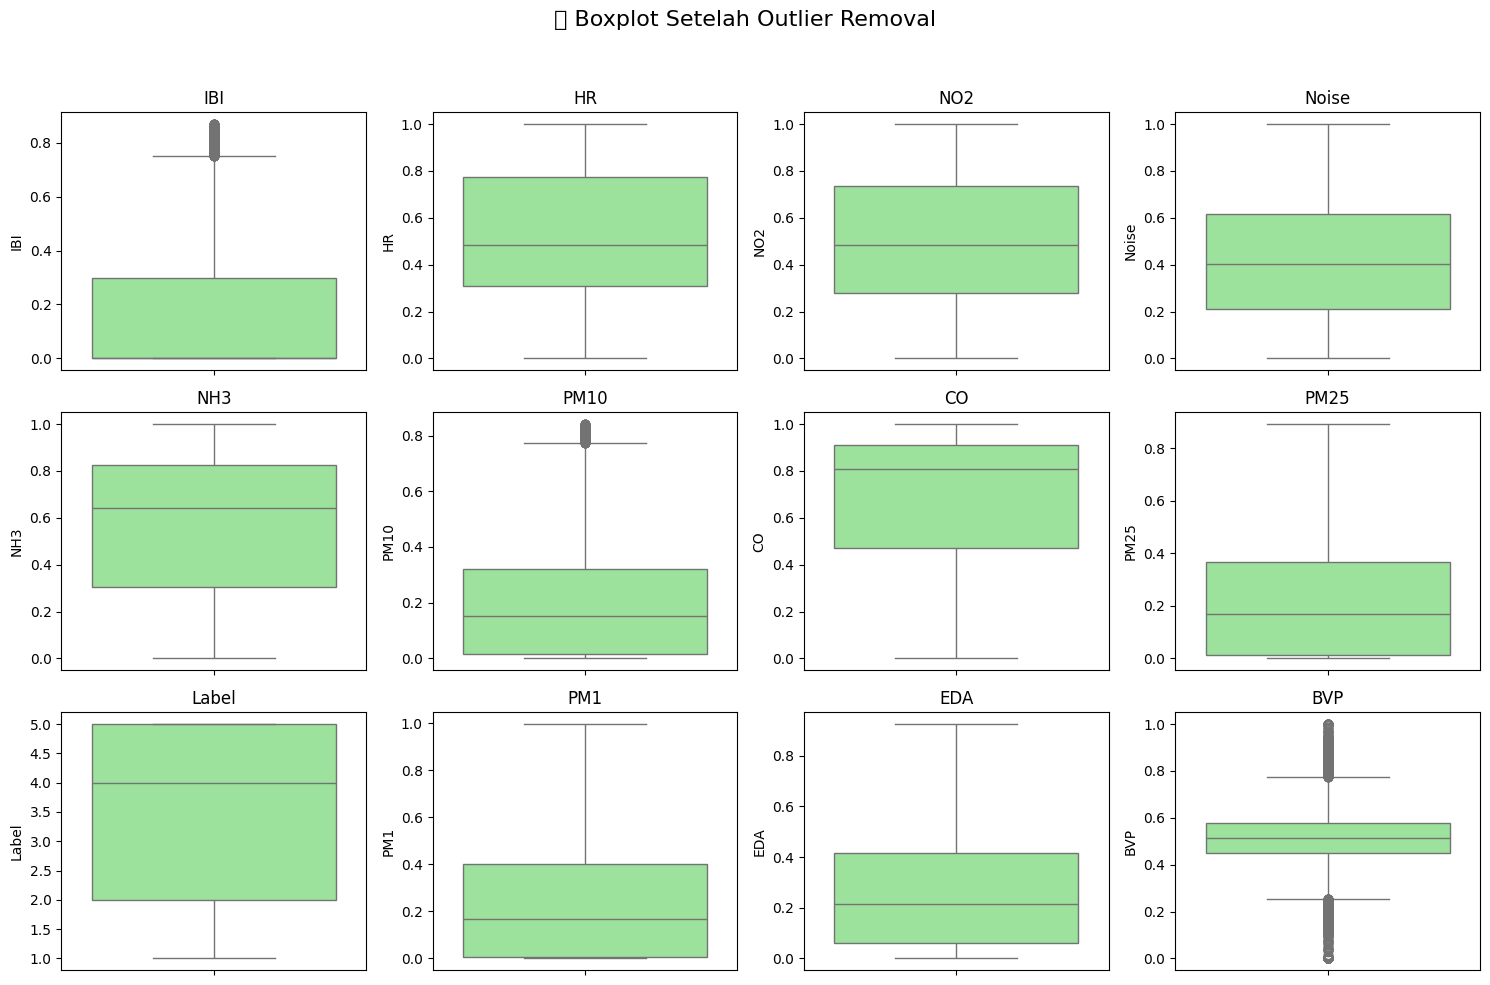

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


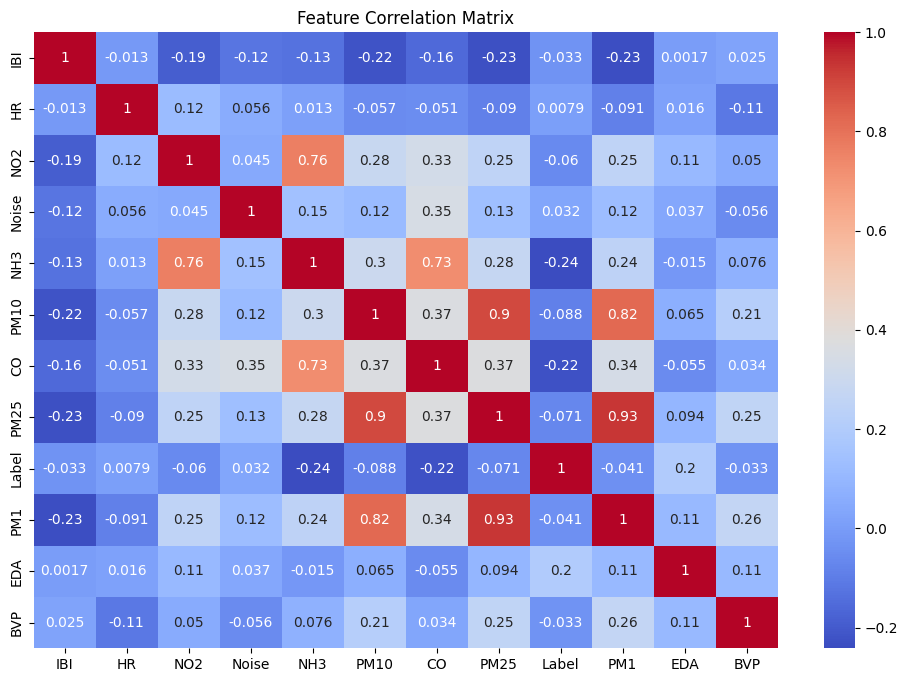

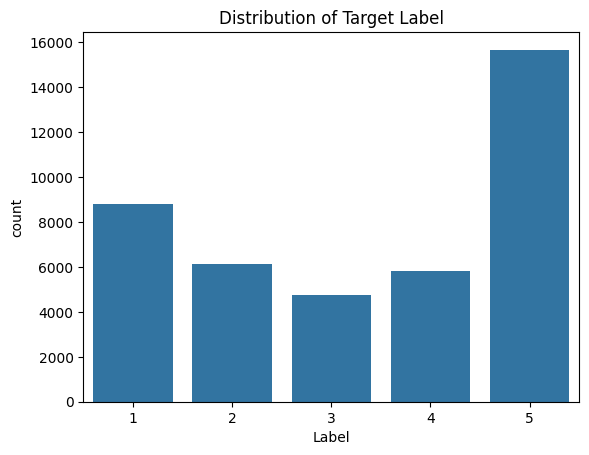

In [15]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [16]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 2. Split train-test (tanpa SMOTE dulu)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribusi sebelum SMOTE:")
print("Train:", Counter(y_train))
print("Test :", Counter(y_test))

# 3. Terapkan SMOTE hanya ke training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi setelah SMOTE (hanya train):")
print("Train SMOTE:", Counter(y_train_smote))
print("Test tetap :", Counter(y_test))  # test tidak berubah


Distribusi sebelum SMOTE:
Train: Counter({5: 12537, 1: 7044, 2: 4909, 4: 4668, 3: 3793})
Test : Counter({5: 3134, 1: 1761, 2: 1228, 4: 1167, 3: 948})

Distribusi setelah SMOTE (hanya train):
Train SMOTE: Counter({2: 12537, 3: 12537, 1: 12537, 5: 12537, 4: 12537})
Test tetap : Counter({5: 3134, 1: 1761, 2: 1228, 4: 1167, 3: 948})


## Prepocessing

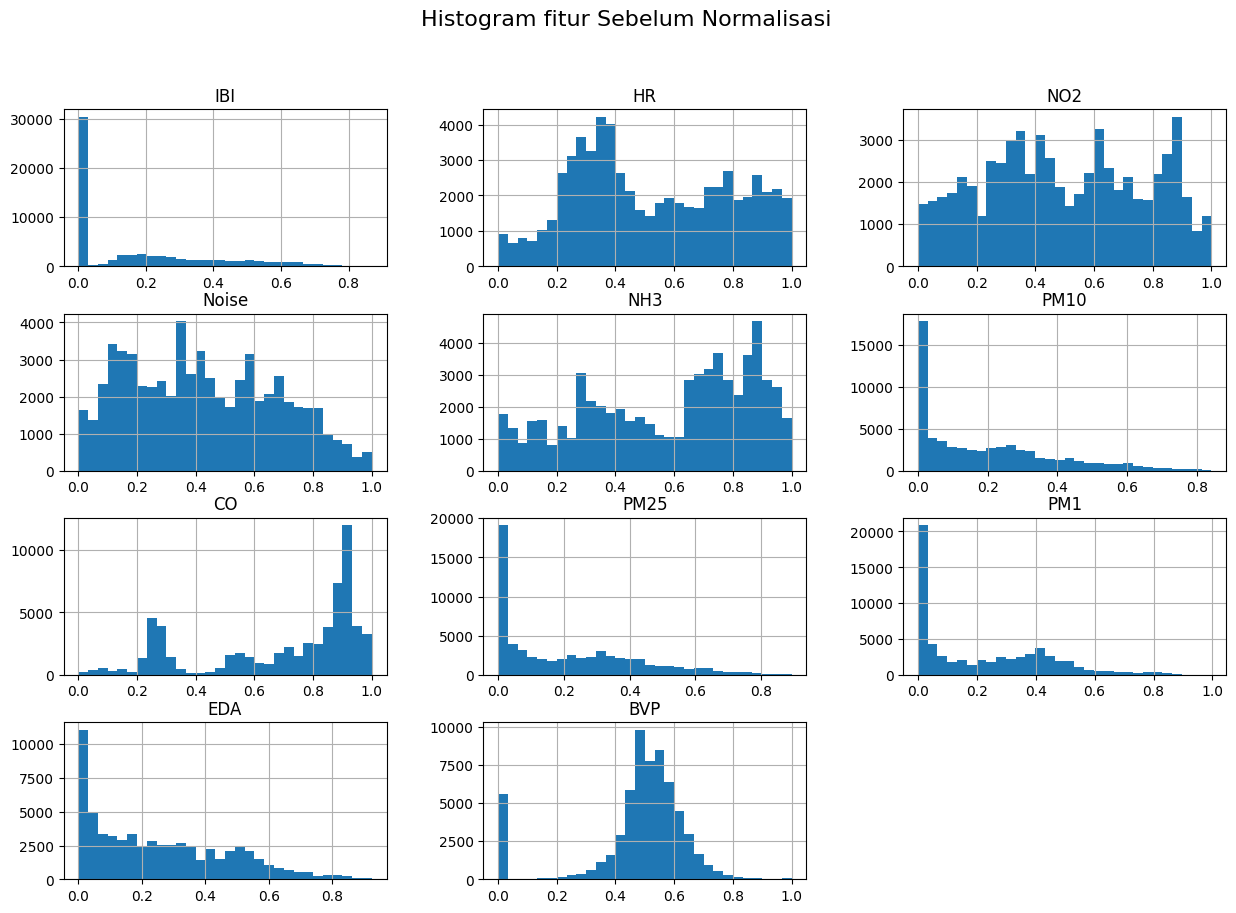

In [18]:
# Histogram sebelum normalisasi
X_train_smote.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [19]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (62685, 11)
Data Test after normalisation = (8238, 11)


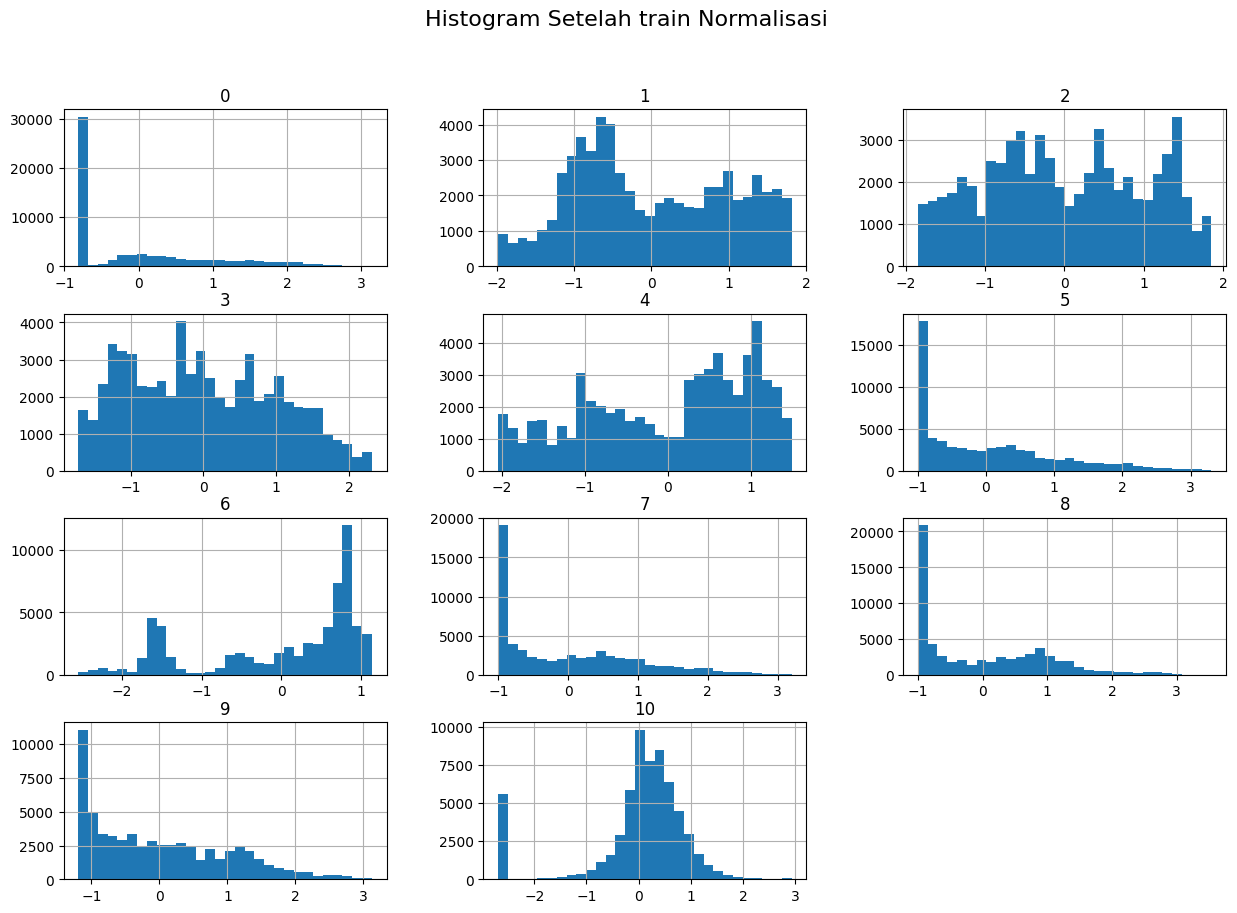

In [20]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

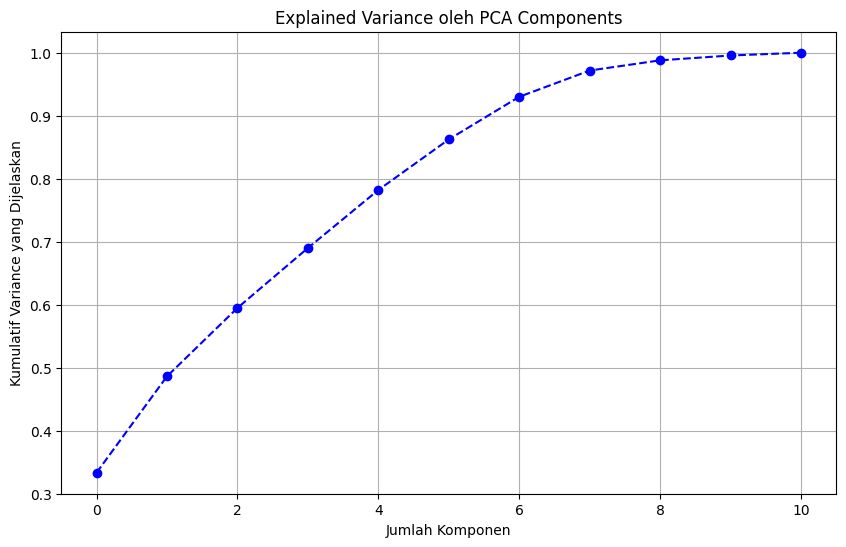

In [21]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [22]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3332 variance terjelaskan
Komponen ke-2: 0.4861 variance terjelaskan
Komponen ke-3: 0.5947 variance terjelaskan
Komponen ke-4: 0.6899 variance terjelaskan
Komponen ke-5: 0.7820 variance terjelaskan
Komponen ke-6: 0.8624 variance terjelaskan
Komponen ke-7: 0.9300 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9879 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [23]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 7)
Shape test PCA: (8238, 7)


## Training Data

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boosting eksternal
from catboost import CatBoostClassifier


def evaluate_ensemble_models(X_train, X_test, y_train, y_test,
                             percobaan="Ensemble", output_file="results2.csv"):
    # === Base Models ===
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    et = ExtraTreesClassifier(n_estimators=100, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    Dt = DecisionTreeClassifier(random_state=42)

    # === Ensemble Models ===
    models = {
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=50, random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                       n_estimators=50, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "Voting (RF+ET+KNN)": VotingClassifier(
            estimators=[("rf", rf), ("et", et), ("knn", knn)], voting="soft"
        ),
        "Stacking (RF+ET+KNN)": StackingClassifier(
            estimators=[("rf", rf), ("et", et), ("knn", knn)],
            final_estimator=CatBoostClassifier(verbose=0, random_state=42)
        ),
        "Voting (RF+ET+DT)": VotingClassifier(
            estimators=[("rf", rf), ("et", et), ("dt", Dt)], voting="soft"
        ),
        "Stacking (RF+ET+DT)": StackingClassifier(
            estimators=[("rf", rf), ("et", et), ("Dt", Dt)],
            final_estimator=CatBoostClassifier(verbose=0, random_state=42)
        ),
    }

    rows = []

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # === Evaluasi ===
        report = classification_report(y_test, y_pred, output_dict=True)
        acc = report["accuracy"]
        prec = report["macro avg"]["precision"]
        rec = report["macro avg"]["recall"]
        f1 = report["macro avg"]["f1-score"]

        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    # === Buat dataframe hasil ===
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model Ensemble:")
    print(df_results)

    # === Simpan ke CSV ===
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # === Visualisasi perbandingan ===
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]]
    df_plot.plot(kind="bar", figsize=(12, 6))
    plt.title(f"Perbandingan Model Ensemble - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return df_results




🔹 Training Bagging...


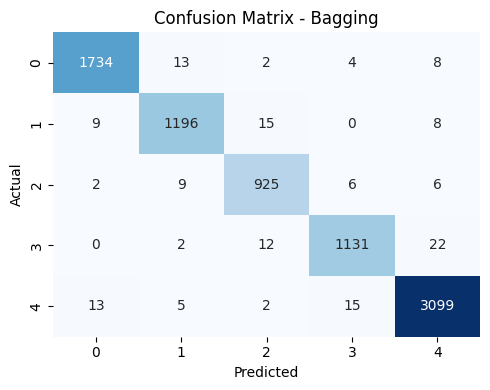


🔹 Training AdaBoost...


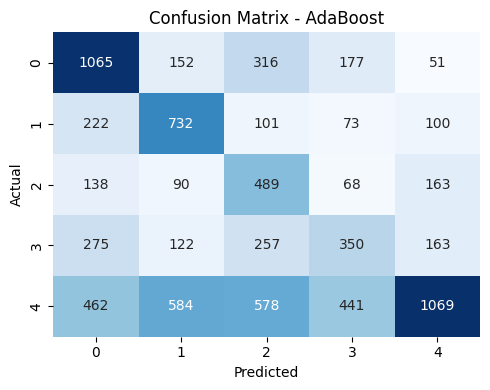


🔹 Training GradientBoosting...


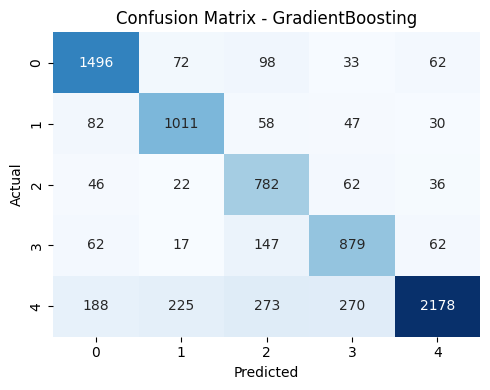


🔹 Training Voting (RF+ET+KNN)...


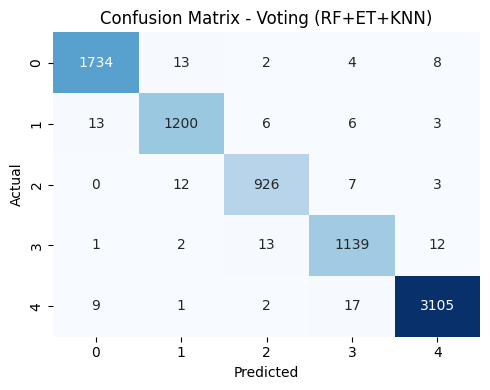


🔹 Training Stacking (RF+ET+KNN)...


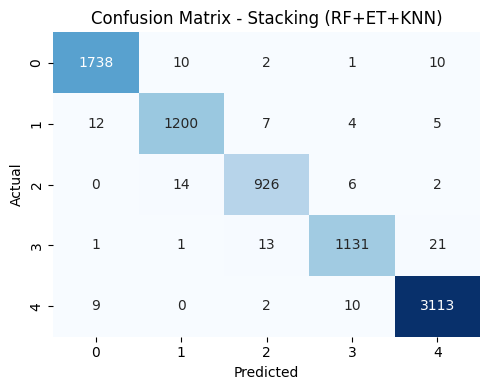


🔹 Training Voting (RF+ET+DT)...


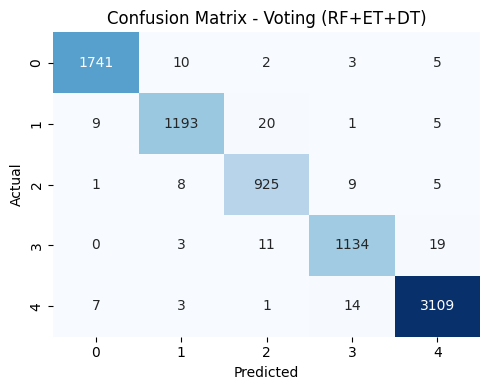


🔹 Training Stacking (RF+ET+DT)...


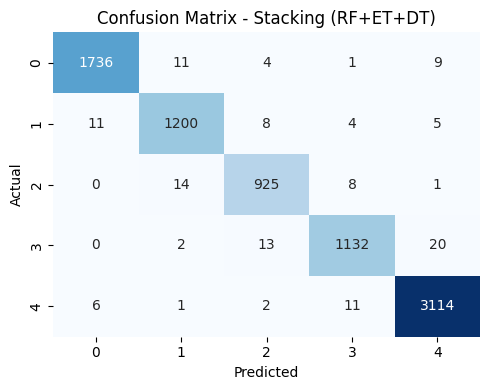


📊 Perbandingan Model Ensemble:
                          Percobaan                 Model  Accuracy  \
0  Baseline Performa Ensemble smote               Bagging  0.981428   
1  Baseline Performa Ensemble smote              AdaBoost  0.449745   
2  Baseline Performa Ensemble smote      GradientBoosting  0.770333   
3  Baseline Performa Ensemble smote    Voting (RF+ET+KNN)  0.983734   
4  Baseline Performa Ensemble smote  Stacking (RF+ET+KNN)  0.984219   
5  Baseline Performa Ensemble smote     Voting (RF+ET+DT)  0.983491   
6  Baseline Performa Ensemble smote   Stacking (RF+ET+DT)  0.984098   

   Precision    Recall  F1-Score  
0   0.978924  0.978466  0.978687  
1   0.443250  0.471539  0.434898  
2   0.745065  0.789175  0.758702  
3   0.980517  0.981083  0.980798  
4   0.982308  0.980676  0.981482  
5   0.980216  0.979925  0.980058  
6   0.981453  0.980474  0.980956  


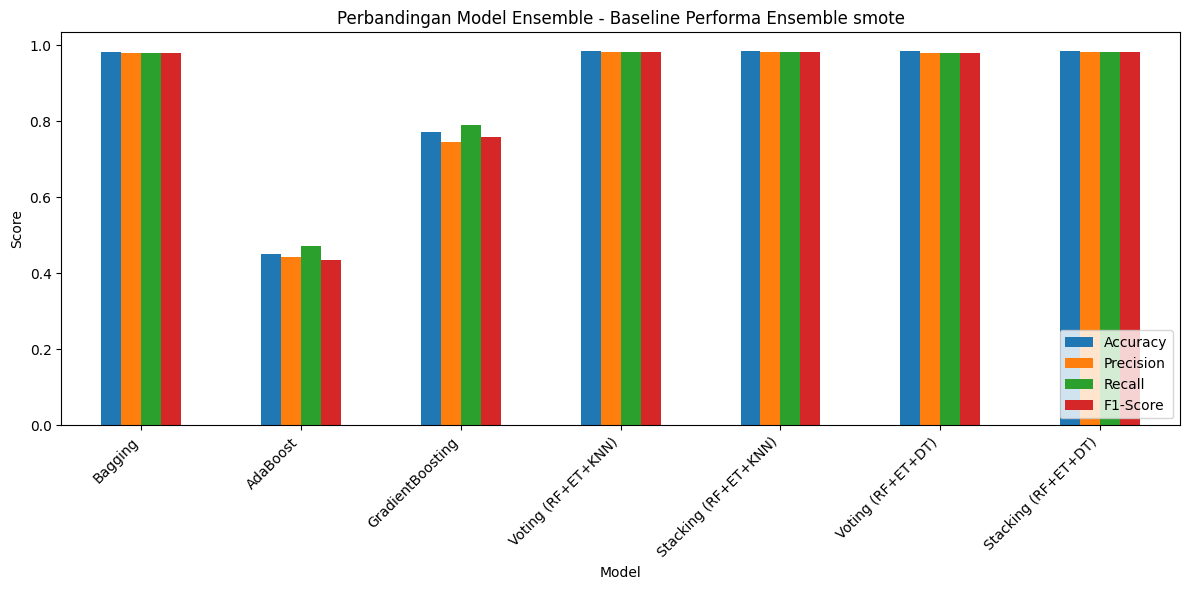

In [25]:
# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_smote, X_test, y_train_smote, y_test,
    percobaan="Baseline Performa Ensemble smote",
    output_file="hasil_ensemble2.csv"
)


🔹 Training Bagging...


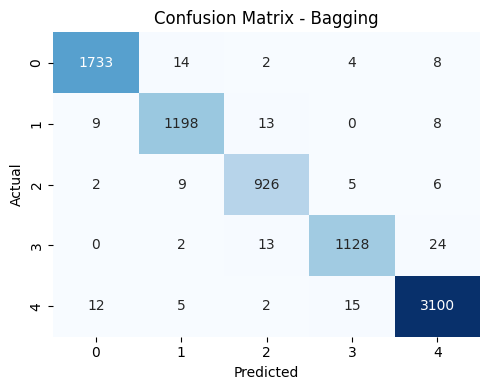


🔹 Training AdaBoost...


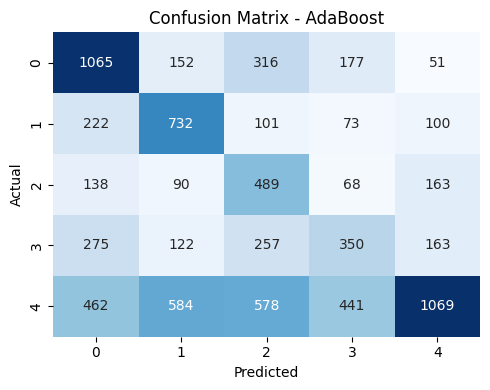


🔹 Training GradientBoosting...


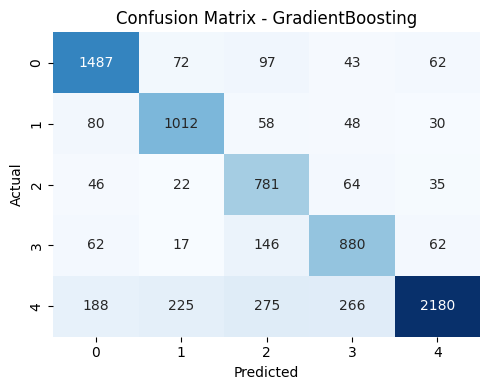


🔹 Training Voting (RF+ET+KNN)...


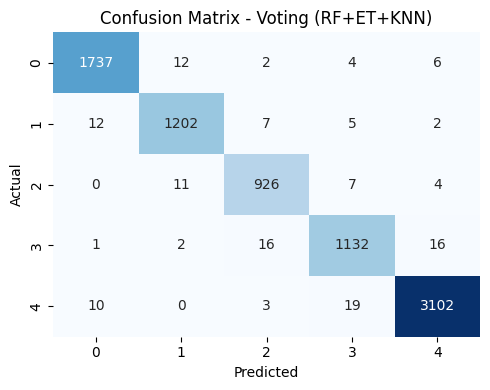


🔹 Training Stacking (RF+ET+KNN)...


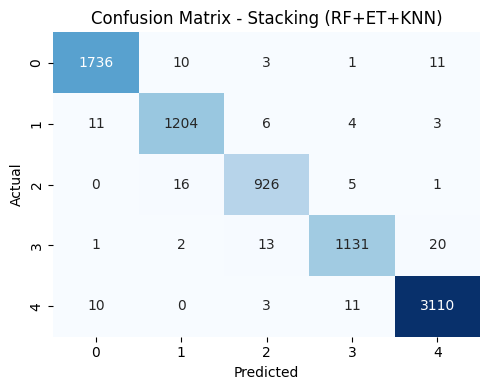


🔹 Training Voting (RF+ET+DT)...


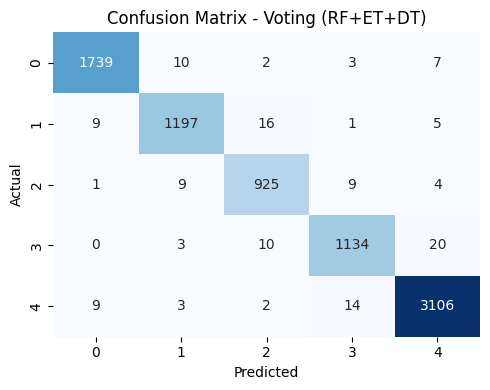


🔹 Training Stacking (RF+ET+DT)...


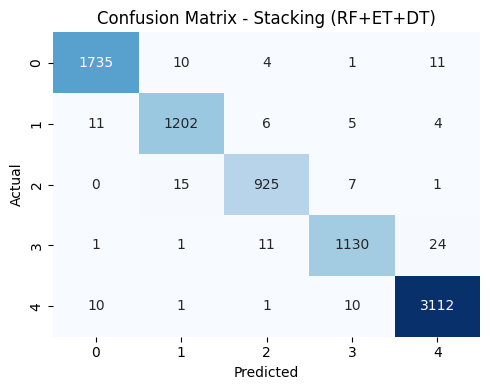


📊 Perbandingan Model Ensemble:
                                        Percobaan                 Model  \
0  Baseline Normalization Performa Ensemble SMOTE               Bagging   
1  Baseline Normalization Performa Ensemble SMOTE              AdaBoost   
2  Baseline Normalization Performa Ensemble SMOTE      GradientBoosting   
3  Baseline Normalization Performa Ensemble SMOTE    Voting (RF+ET+KNN)   
4  Baseline Normalization Performa Ensemble SMOTE  Stacking (RF+ET+KNN)   
5  Baseline Normalization Performa Ensemble SMOTE     Voting (RF+ET+DT)   
6  Baseline Normalization Performa Ensemble SMOTE   Stacking (RF+ET+DT)   

   Accuracy  Precision    Recall  F1-Score  
0  0.981428   0.979127  0.978439  0.978770  
1  0.449745   0.443250  0.471539  0.434898  
2  0.769604   0.744215  0.788403  0.757887  
3  0.983127   0.979654  0.980358  0.980004  
4  0.984098   0.981822  0.980909  0.981356  
5  0.983370   0.980521  0.980158  0.980334  
6  0.983734   0.981928  0.980215  0.981063  


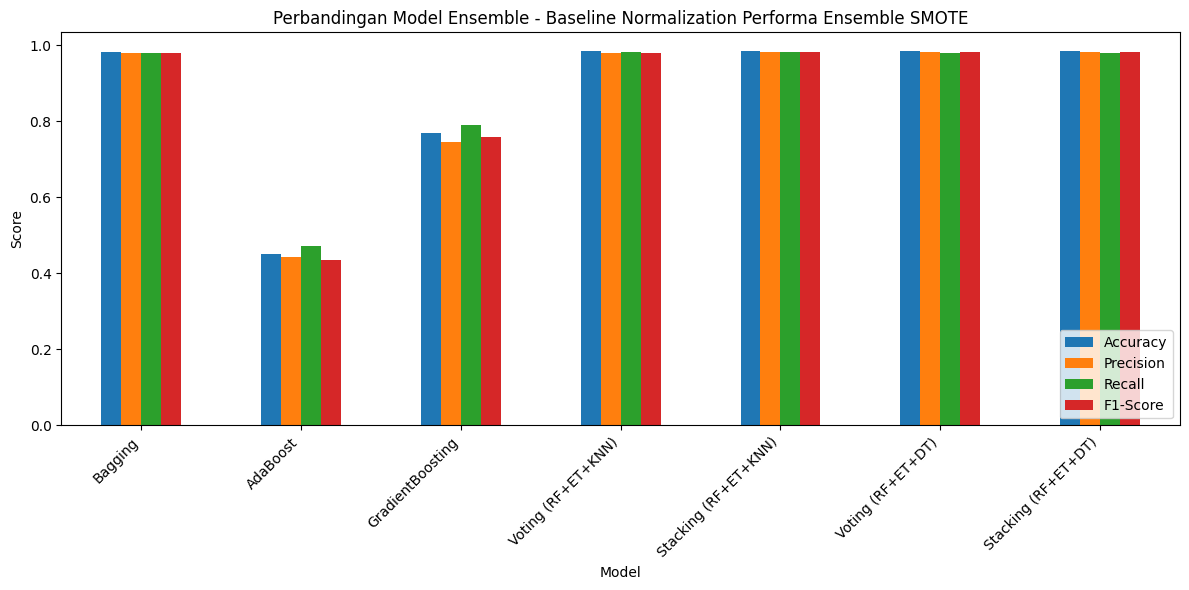

In [26]:
# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_scaled, X_test_scaled, y_train_smote, y_test,
    percobaan="Baseline Normalization Performa Ensemble SMOTE",
    output_file="hasil_ensemble2.csv"
)

In [27]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 8 komponen
pca = PCA(n_components=8)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 8)
Shape test PCA: (8238, 8)



🔹 Training Bagging...


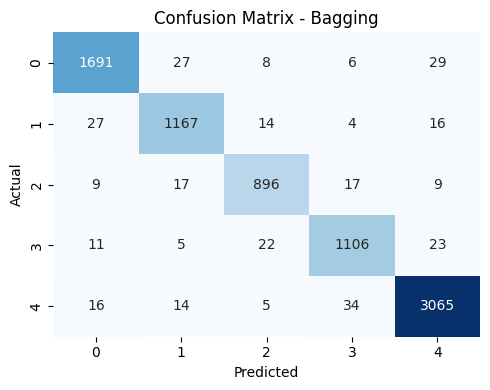


🔹 Training AdaBoost...


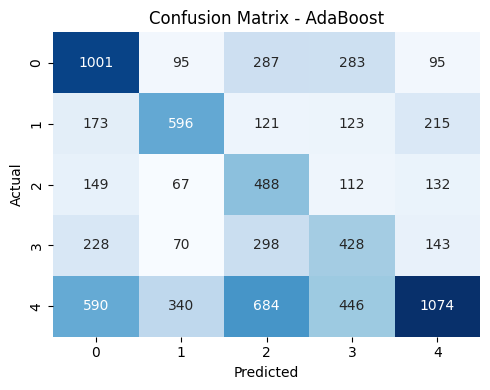


🔹 Training GradientBoosting...


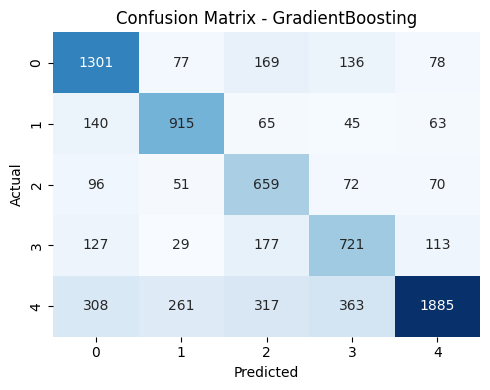


🔹 Training Voting (RF+ET+KNN)...


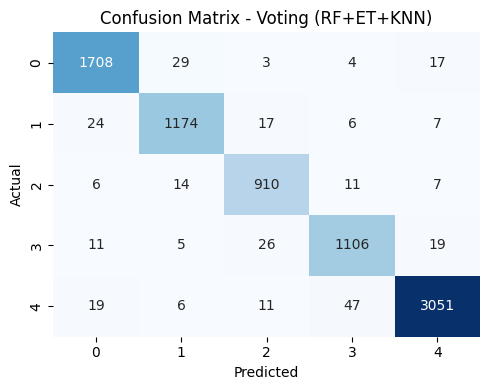


🔹 Training Stacking (RF+ET+KNN)...


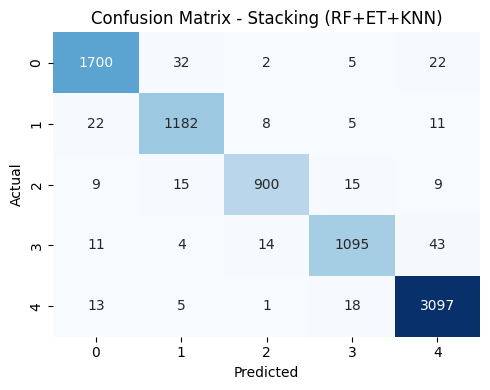


🔹 Training Voting (RF+ET+DT)...


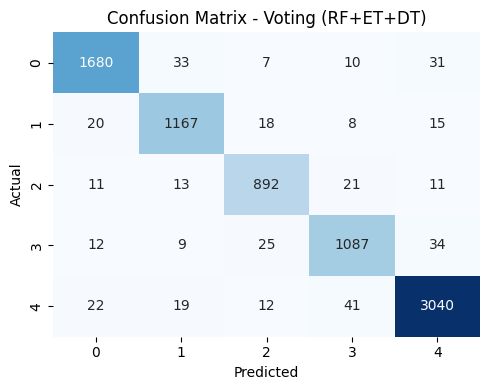


🔹 Training Stacking (RF+ET+DT)...


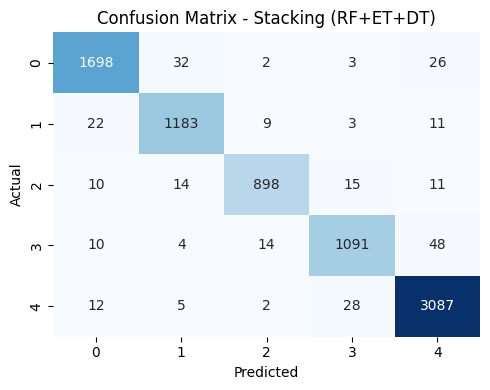


📊 Perbandingan Model Ensemble:
                       Percobaan                 Model  Accuracy  Precision  \
0  PCA 8 Performa Ensemble SMOTE               Bagging  0.962005   0.956847   
1  PCA 8 Performa Ensemble SMOTE              AdaBoost  0.435421   0.438503   
2  PCA 8 Performa Ensemble SMOTE      GradientBoosting  0.665331   0.642776   
3  PCA 8 Performa Ensemble SMOTE    Voting (RF+ET+KNN)  0.964919   0.957820   
4  PCA 8 Performa Ensemble SMOTE  Stacking (RF+ET+KNN)  0.967953   0.966380   
5  PCA 8 Performa Ensemble SMOTE     Voting (RF+ET+DT)  0.954843   0.948103   
6  PCA 8 Performa Ensemble SMOTE   Stacking (RF+ET+DT)  0.965890   0.964484   

     Recall  F1-Score  
0  0.956287  0.956565  
1  0.455596  0.427718  
2  0.679668  0.651504  
3  0.961418  0.959592  
4  0.960753  0.963493  
5  0.949342  0.948712  
6  0.958943  0.961643  


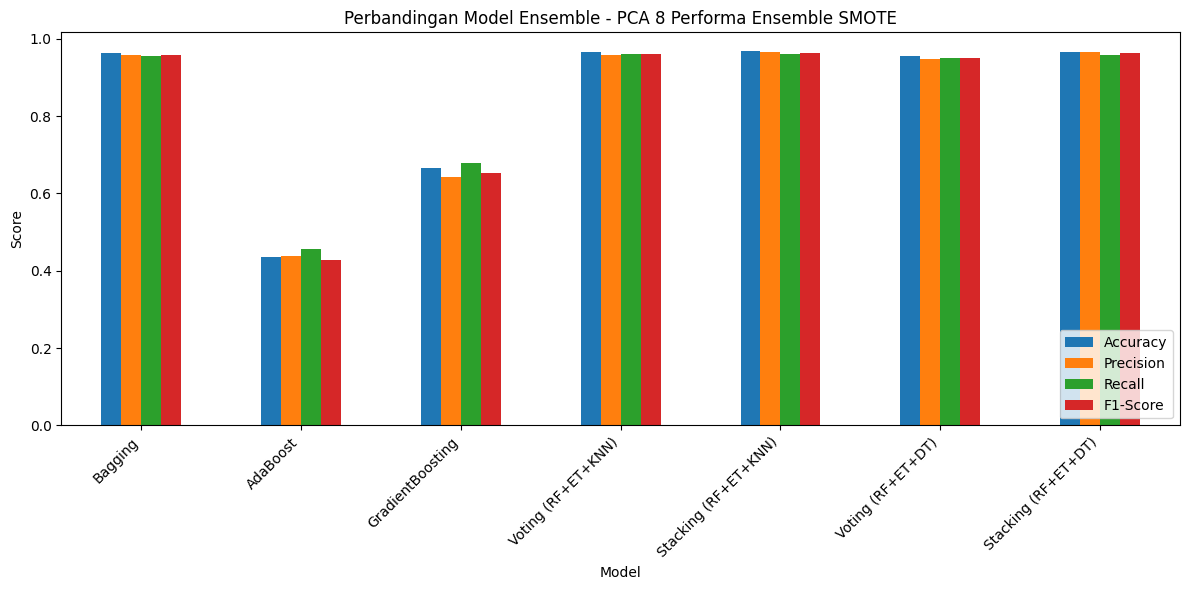

In [28]:

# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_pca, X_test_pca, y_train_smote, y_test,
    percobaan="PCA 8 Performa Ensemble SMOTE",
    output_file="hasil_ensemble2.csv"
)


In [29]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 7)
Shape test PCA: (8238, 7)



🔹 Training Bagging...


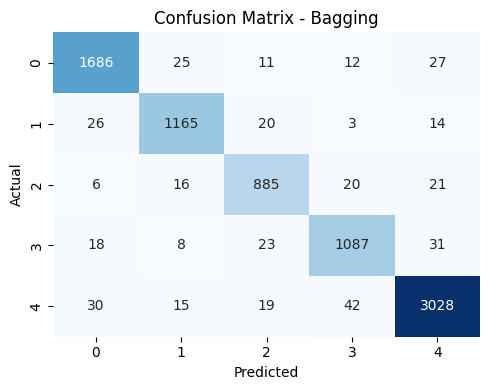


🔹 Training AdaBoost...


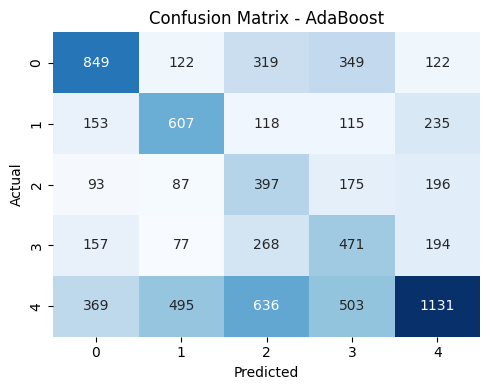


🔹 Training GradientBoosting...


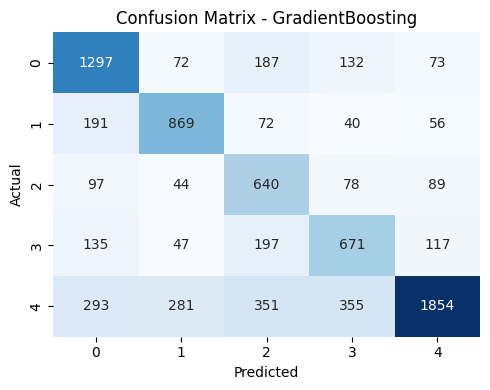


🔹 Training Voting (RF+ET+KNN)...


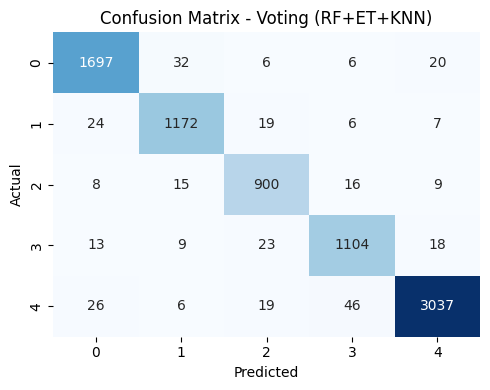


🔹 Training Stacking (RF+ET+KNN)...


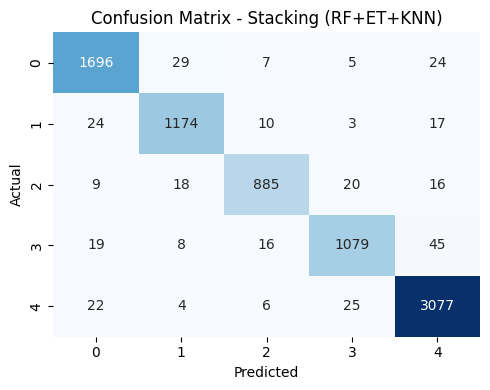


🔹 Training Voting (RF+ET+DT)...


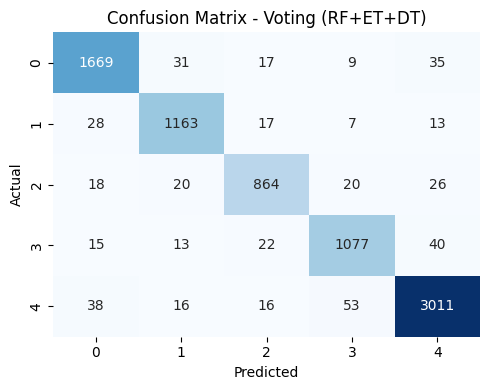


🔹 Training Stacking (RF+ET+DT)...


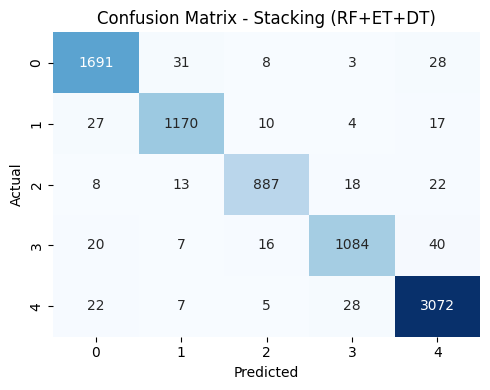


📊 Perbandingan Model Ensemble:
                       Percobaan                 Model  Accuracy  Precision  \
0  PCA 7 Performa Ensemble SMOTE               Bagging  0.953023   0.946095   
1  PCA 7 Performa Ensemble SMOTE              AdaBoost  0.419398   0.416747   
2  PCA 7 Performa Ensemble SMOTE      GradientBoosting  0.647123   0.624255   
3  PCA 7 Performa Ensemble SMOTE    Voting (RF+ET+KNN)  0.960185   0.952005   
4  PCA 7 Performa Ensemble SMOTE  Stacking (RF+ET+KNN)  0.960306   0.957846   
5  PCA 7 Performa Ensemble SMOTE     Voting (RF+ET+DT)  0.944890   0.937982   
6  PCA 7 Performa Ensemble SMOTE   Stacking (RF+ET+DT)  0.959456   0.957366   

     Recall  F1-Score  
0  0.947456  0.946769  
1  0.431934  0.410382  
2  0.657166  0.630338  
3  0.956497  0.954217  
4  0.951813  0.954743  
5  0.937970  0.937961  
6  0.951553  0.954391  


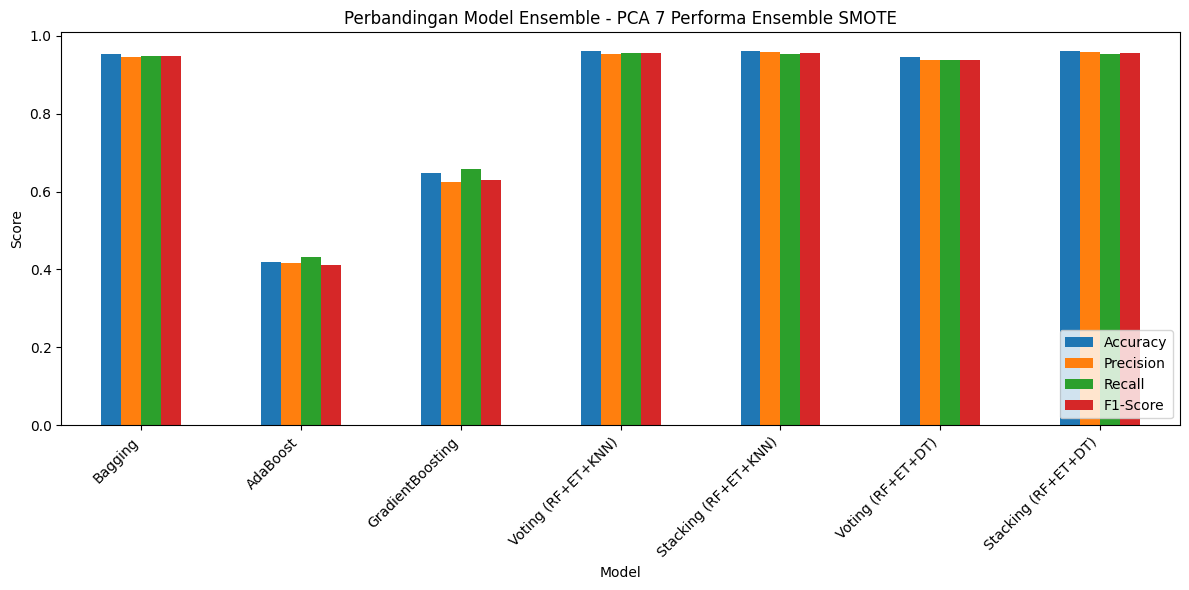

In [30]:

# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_pca, X_test_pca, y_train_smote, y_test,
    percobaan="PCA 7 Performa Ensemble SMOTE",
    output_file="hasil_ensemble2.csv"
)


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 6)
Shape test PCA: (8238, 6)



🔹 Training Bagging...


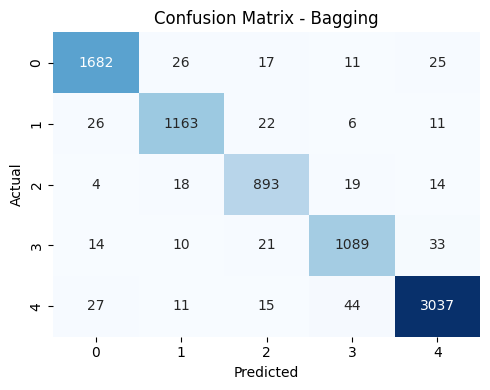


🔹 Training AdaBoost...


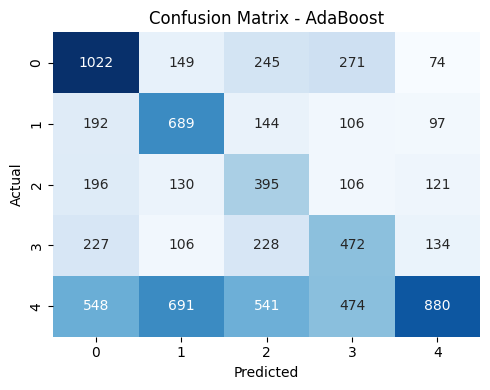


🔹 Training GradientBoosting...


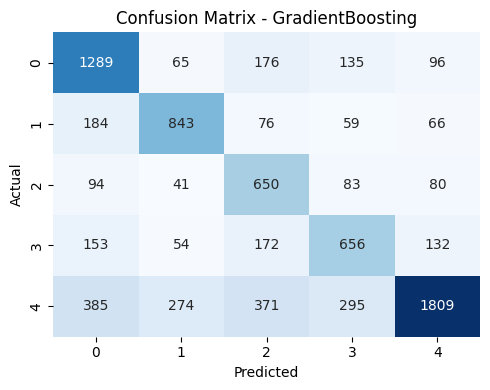


🔹 Training Voting (RF+ET+KNN)...


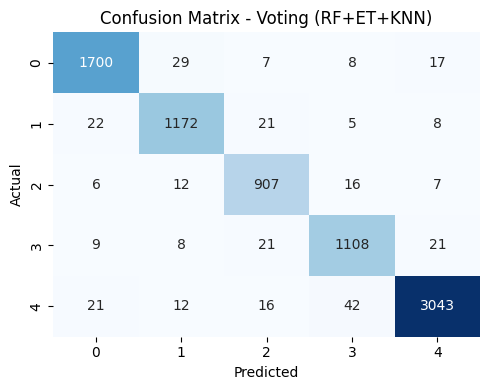


🔹 Training Stacking (RF+ET+KNN)...


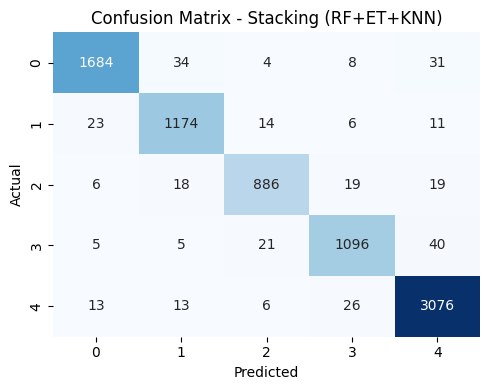


🔹 Training Voting (RF+ET+DT)...


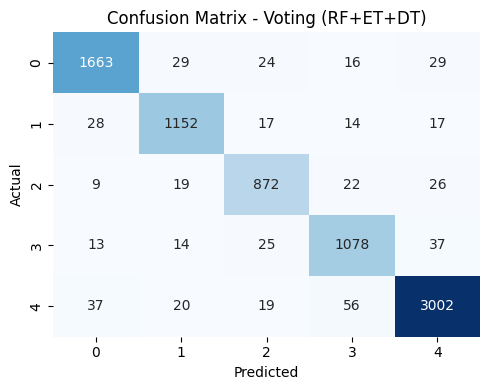


🔹 Training Stacking (RF+ET+DT)...


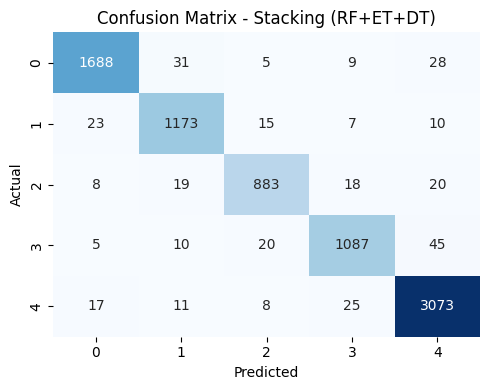


📊 Perbandingan Model Ensemble:
                       Percobaan                 Model  Accuracy  Precision  \
0  PCA 6 Performa Ensemble SMOTE               Bagging  0.954601   0.946810   
1  PCA 6 Performa Ensemble SMOTE              AdaBoost  0.419762   0.423313   
2  PCA 6 Performa Ensemble SMOTE      GradientBoosting  0.636926   0.617040   
3  PCA 6 Performa Ensemble SMOTE    Voting (RF+ET+KNN)  0.962612   0.954665   
4  PCA 6 Performa Ensemble SMOTE  Stacking (RF+ET+KNN)  0.960913   0.957074   
5  PCA 6 Performa Ensemble SMOTE     Voting (RF+ET+DT)  0.942826   0.933783   
6  PCA 6 Performa Ensemble SMOTE   Stacking (RF+ET+DT)  0.959456   0.955402   

     Recall  F1-Score  
0  0.949280  0.948023  
1  0.448668  0.410861  
2  0.648690  0.622282  
3  0.959383  0.956981  
4  0.953511  0.955241  
5  0.936782  0.935261  
6  0.951435  0.953365  


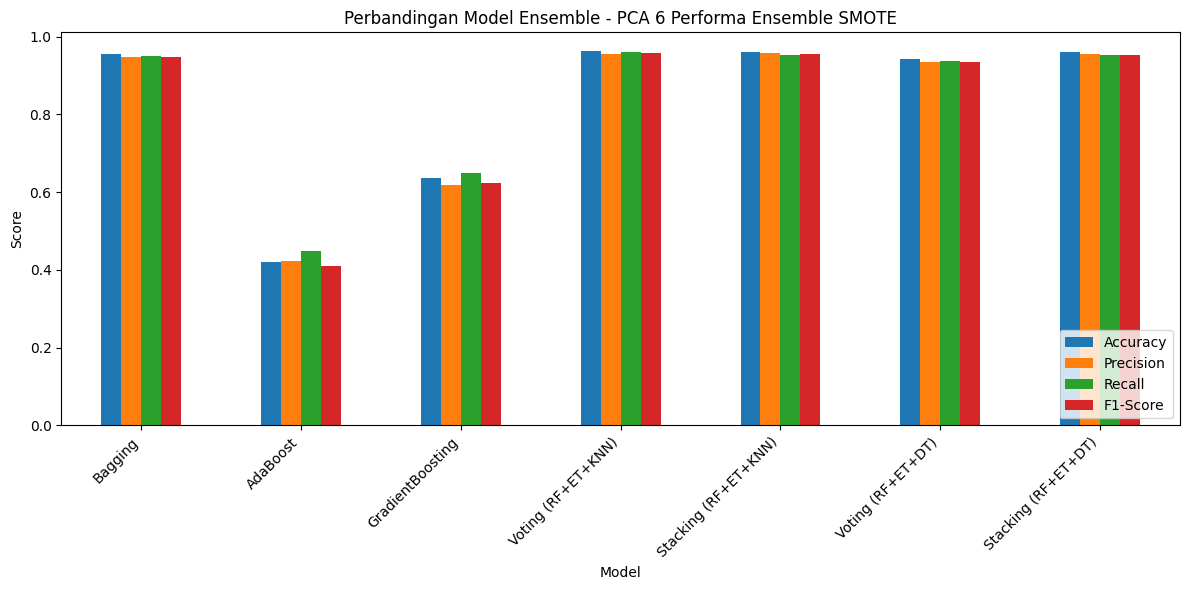

In [32]:

# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_pca, X_test_pca, y_train_smote, y_test,
    percobaan="PCA 6 Performa Ensemble SMOTE",
    output_file="hasil_ensemble2.csv"
)


In [33]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 5)
Shape test PCA: (8238, 5)



🔹 Training Bagging...


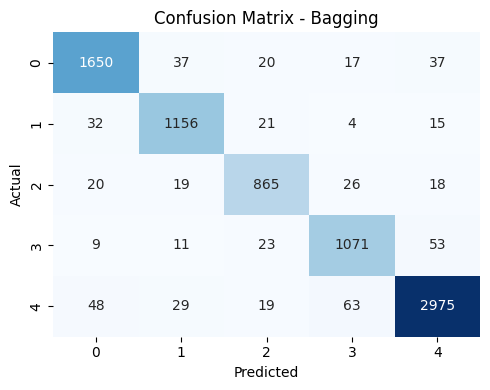


🔹 Training AdaBoost...


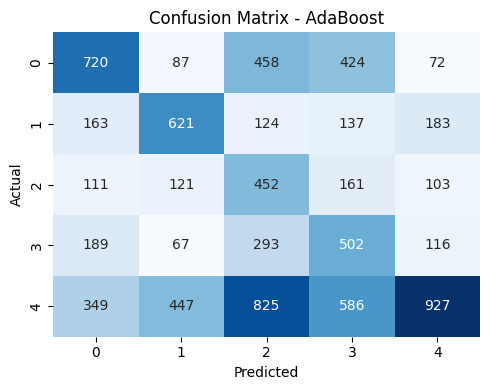


🔹 Training GradientBoosting...


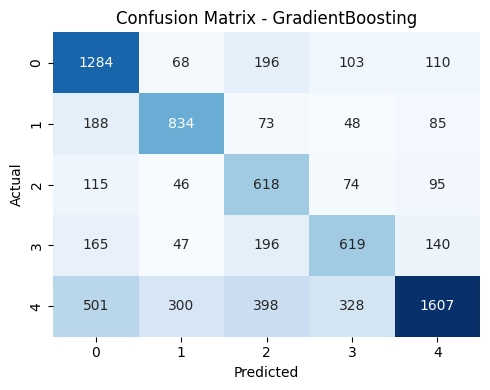


🔹 Training Voting (RF+ET+KNN)...


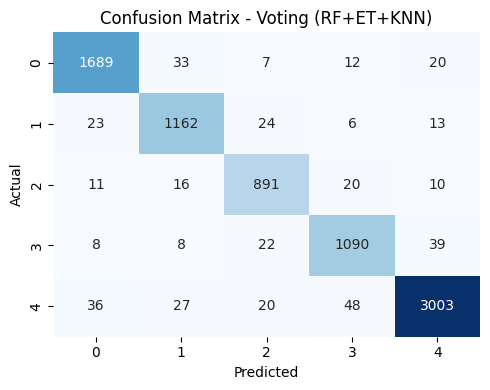


🔹 Training Stacking (RF+ET+KNN)...


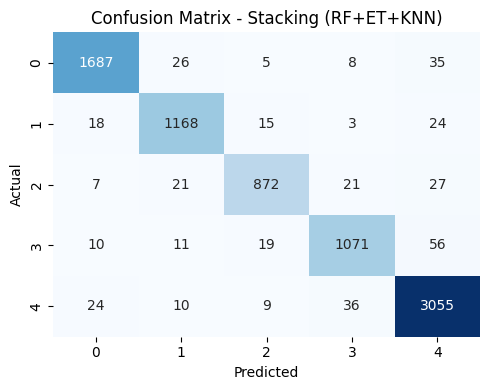


🔹 Training Voting (RF+ET+DT)...


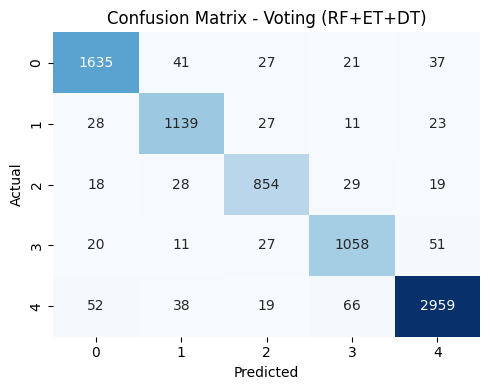


🔹 Training Stacking (RF+ET+DT)...


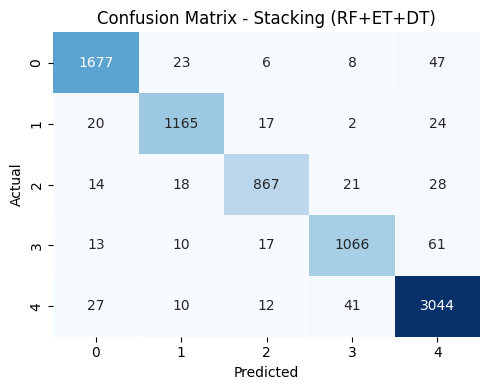


📊 Perbandingan Model Ensemble:
                       Percobaan                 Model  Accuracy  Precision  \
0  PCA 5 Performa Ensemble SMOTE               Bagging  0.936756   0.928192   
1  PCA 5 Performa Ensemble SMOTE              AdaBoost  0.391114   0.416285   
2  PCA 5 Performa Ensemble SMOTE      GradientBoosting  0.602331   0.589654   
3  PCA 5 Performa Ensemble SMOTE    Voting (RF+ET+KNN)  0.951080   0.942601   
4  PCA 5 Performa Ensemble SMOTE  Stacking (RF+ET+KNN)  0.953265   0.950980   
5  PCA 5 Performa Ensemble SMOTE     Voting (RF+ET+DT)  0.928017   0.916947   
6  PCA 5 Performa Ensemble SMOTE   Stacking (RF+ET+DT)  0.949138   0.947639   

     Recall  F1-Score  
0  0.931557  0.929844  
1  0.423461  0.391611  
2  0.620673  0.592112  
3  0.947492  0.945008  
4  0.944296  0.947544  
5  0.921515  0.919183  
6  0.940058  0.943749  


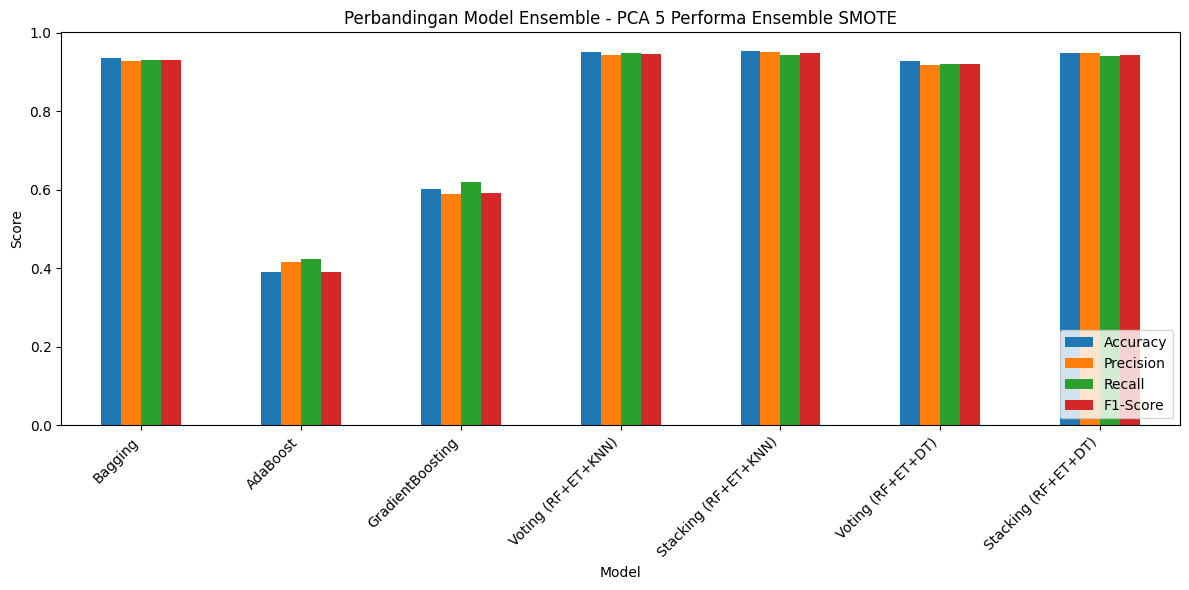

In [34]:

# === Cara pakai ===
df_results = evaluate_ensemble_models(
    X_train_pca, X_test_pca, y_train_smote, y_test,
    percobaan="PCA 5 Performa Ensemble SMOTE",
    output_file="hasil_ensemble2.csv"
)
